In [44]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean,hmean
from scipy.stats import kurtosis, skew
%matplotlib inline

## Medidas de dispersão

In [2]:
dados_dispersao = [10,20,30,40,50,60,70,80,90,100]

Média

In [3]:
np.mean(dados_dispersao)

55.0

Variância

In [4]:
np.var(dados_dispersao)

825.0

Desvio Padrão

In [5]:
np.std(dados_dispersao)

28.722813232690143

Coeficiente de Variação

In [9]:
stats.variation(dados_dispersao)

0.5222329678670935

Importante: Um coeficiente de variação menor que 25% é um bom indicativo de homogeneidade dos dados, ou seja, os dados não variam muito

In [11]:
media=np.mean(dados_dispersao)
desvio_padrao = np.std(dados_dispersao)

In [12]:
desvio_padrao/media

0.5222329678670935

Exemplo usando Pandas

In [15]:
df = pd.read_csv(r"C:\Users\marcf\OneDrive\Documentos\Ciencia de dados\materiais-de-apoio-pandas - Curso Edu\Materiais de Apoio\Materiais de apoio - Estatística Aplicada\cars.csv")

In [16]:
df.head(10)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197
5,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,"$46,100","$41,100",3.5,6.0,225,18,24,3893,115,197
6,Acura,NSX coupe 2dr manual S,Sports,Asia,Rear,"$89,765","$79,978",3.2,6.0,290,17,24,3153,100,174
7,Audi,A4 1.8T 4dr,Sedan,Europe,Front,"$25,940","$23,508",1.8,4.0,170,22,31,3252,104,179
8,Audi,A41.8T convertible 2dr,Sedan,Europe,Front,"$35,940","$32,506",1.8,4.0,170,23,30,3638,105,180
9,Audi,A4 3.0 4dr,Sedan,Europe,Front,"$31,840","$28,846",3.0,6.0,220,20,28,3462,104,179


Verificando as informações do conjunto de dados

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


Limpando os dados do atributo MSRP

In [19]:
df['MSRP'] = [x.replace('$','')for x in df["MSRP"]]
df['MSRP'] = [x.replace(',','')for x in df["MSRP"]]

Verificando os dados após limpeza

In [22]:
df["MSRP"].head(5)

0    36945
1    23820
2    26990
3    33195
4    43755
Name: MSRP, dtype: object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


Transformando os dados para o formato numérico.

In [25]:
df['MSRP'] = pd.to_numeric(df['MSRP'],errors='coerce')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    int64  
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 50.3+ KB


In [27]:
df.describe()

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


Calculando a média aritmética de uma coluna

In [28]:
df['MSRP'].mean()

32774.85514018692

In [29]:
msrp = df['MSRP']

In [33]:
msrp.mean()

32774.85514018692

Média Geométrica

In [35]:
gmean(msrp)

28841.635198804073

Mediana

In [36]:
msrp.median()

27635.0

moda

In [37]:
msrp.mode()

0     13270
1     15389
2     19635
3     19860
4     21055
5     21595
6     23495
7     23895
8     25700
9     27490
10    28495
11    29995
12    31545
13    33995
14    34495
15    35940
16    49995
17    74995
dtype: int64

Variação

In [38]:
msrp.var()

377591612.88763136

Desvio Padrão

In [39]:
msrp.std()

19431.716673717518

Valor Máximo

In [40]:
msrp.max()

192465

Valor Mínimo

In [41]:
msrp.min()

10280

Função para calcular estatísticas

In [54]:
def calcula_estatisticas(data):
    mean = round(np.mean(data),2)
    mode = round(stats.mode(data,)[0][0],2)
    median = round(np.median(data),2)
    var = round(np.var(data),2)
    std = round(np.std(data),2)
    coef_pearson = round(stats.skew(data),2)
    coef_kurtosis = round(kurtosis(data),2)
    msg = print('Media: {}\nModa: {}\nMediana: {}\nVariância: {}\nDesvio Padrão: {}\nCoeficiente Pearson: {}\nCoeficiente Kurtosis: {}'.format(mean,mode,median,var,std,coef_pearson,coef_kurtosis))
    return msg

Amostra

In [48]:
s0 = [4,5,6,5,5,6,6,5,4,5,5,5]

In [55]:
 calcula_estatisticas(s0)

Media: 5.08
Moda: 5
Mediana: 5.0
Variância: 0.41
Desvio Padrão: 0.64
Coeficiente Pearson: -0.08
Coeficiente Kurtosis: -0.58


Distribuição Simétrica - Média = Mediana

C:\Users\marcf\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\marcf\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


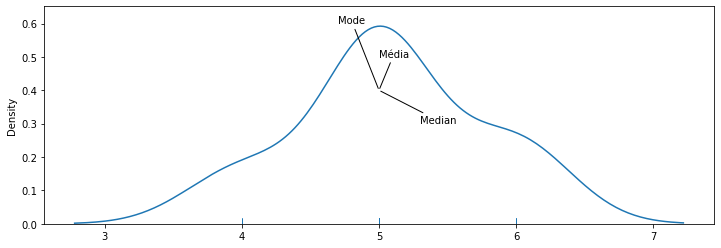

In [71]:
fig = plt.figure(figsize=(12,4))
ax = sns.distplot(s0,rug=True,kde=True,hist=False)

ax.annotate('Mode', xy=(5, 0.4), xytext=(4.7, 0.6), arrowprops={'arrowstyle': '-'})
ax.annotate('Median', xy=(5, 0.4), xytext=(5.3, 0.3), arrowprops={'arrowstyle': '-'})
ax.annotate('Média', xy=(5, 0.4), xytext=(5.0, 0.5), arrowprops={'arrowstyle': '-'})
plt.show()

Segunda amostra

In [72]:
s1 = [12,8.0,4,3,2,1,1]

In [73]:
 calcula_estatisticas(s1)

Media: 4.43
Moda: 1.0
Mediana: 3.0
Variância: 14.53
Desvio Padrão: 3.81
Coeficiente Pearson: 0.98
Coeficiente Kurtosis: -0.45


Assimetria Positiva / à direitra - média > moda > mediana

C:\Users\marcf\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\marcf\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


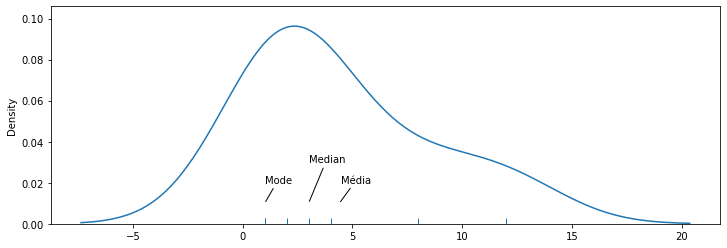

In [78]:
fig = plt.figure(figsize=(12,4))
ax = sns.distplot(s1,rug=True,kde=True,hist=False)

ax.annotate('Mode', xy=(1, 0.01), xytext=(1, 0.02), arrowprops={'arrowstyle': '-'})
ax.annotate('Median', xy=(3, 0.01), xytext=(3, 0.03), arrowprops={'arrowstyle': '-'})
ax.annotate('Média', xy=(4.4, 0.01), xytext=(4.5, 0.02), arrowprops={'arrowstyle': '-'})
plt.show()

Coeficiente de Pearson - Quando o valor é próximo de 1 a distribuição é assimétrica positiva

In [81]:
# Terceira amostra
s2 = [-3,-1,4,2.5,4,3]

In [82]:
 calcula_estatisticas(s2)

Media: 1.58
Moda: 4.0
Mediana: 2.75
Variância: 7.03
Desvio Padrão: 2.65
Coeficiente Pearson: -0.73
Coeficiente Kurtosis: -1.12


Assimétrica negativa / a esquerda - média < moda < mediana

C:\Users\marcf\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\marcf\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


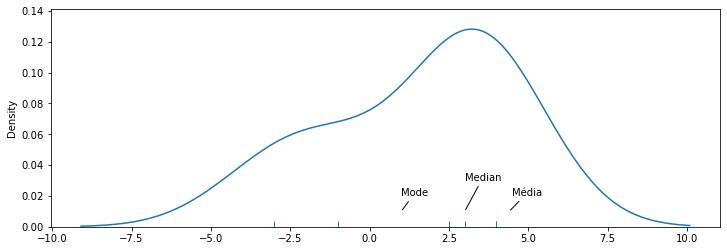

In [83]:
fig = plt.figure(figsize=(12,4))
ax = sns.distplot(s2,rug=True,kde=True,hist=False)

ax.annotate('Mode', xy=(1, 0.01), xytext=(1, 0.02), arrowprops={'arrowstyle': '-'})
ax.annotate('Median', xy=(3, 0.01), xytext=(3, 0.03), arrowprops={'arrowstyle': '-'})
ax.annotate('Média', xy=(4.4, 0.01), xytext=(4.5, 0.02), arrowprops={'arrowstyle': '-'})
plt.show()

Coeficiente de Pearson - O valor é próximo de -1, a distribuição é assimétrica negativa

## Gerando dados aleatórios

Amostra seguindo uma distribuição normal

In [84]:
sample_normal = np.random.normal(1,0.5,500)

In [86]:
sample_normal[:10]

array([0.78772541, 0.44376622, 1.78478779, 1.41912844, 0.51315248,
       0.88123756, 1.01088733, 0.33869975, 1.41192951, 1.2667168 ])

In [87]:
 calcula_estatisticas(sample_normal)

Media: 1.02
Moda: -0.19
Mediana: 1.04
Variância: 0.24
Desvio Padrão: 0.49
Coeficiente Pearson: 0.0
Coeficiente Kurtosis: -0.41


Visualizando distribuição

C:\Users\marcf\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

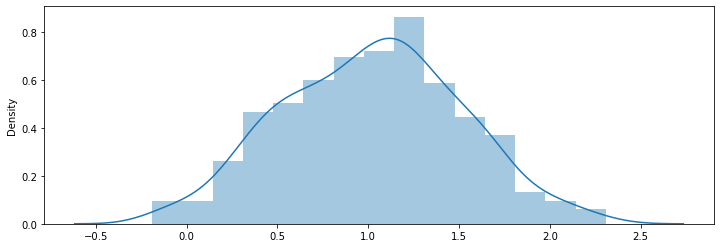

In [91]:
fig = plt.figure(figsize=(12,4))
sns.distplot(sample_normal)

Distribuição Simétrica, com o coeficiente de pearson próximo a zero

exemplo:

In [92]:
exp = np.arange(2,len(sample_normal))

Verificando expoentes

In [93]:
exp[:10]

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Gerando uma distribuição assimétrica positiva

In [94]:
sample_assimetrica_positiva = []
for s,e in zip(sample_normal,exp):
    sample_assimetrica_positiva.append(s*e)

In [95]:
 calcula_estatisticas(sample_assimetrica_positiva)

Media: 256.67
Moda: -82.23
Mediana: 204.23
Variância: 42422.53
Desvio Padrão: 205.97
Coeficiente Pearson: 0.92
Coeficiente Kurtosis: 0.35


Visualizando a distribuição

C:\Users\marcf\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

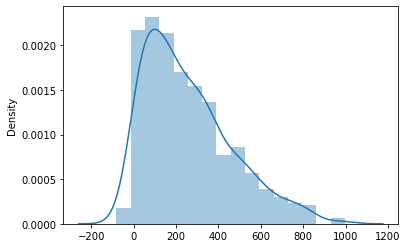

In [96]:
sns.distplot(sample_assimetrica_positiva)

Gerando uma distribuição assimétrica negativa

In [97]:
exp = (np.arange(2,len(sample_normal),2))*-1

Verificando expoentes

In [98]:
exp[:10]

array([ -2,  -4,  -6,  -8, -10, -12, -14, -16, -18, -20])

In [99]:
sample_assimetrica_negativa = []
for s,e in zip(sample_normal,exp):
    sample_assimetrica_negativa.append(s*e)

In [100]:
calcula_estatisticas(sample_assimetrica_negativa)

Media: -259.73
Moda: -884.58
Mediana: -209.39
Variância: 42032.69
Desvio Padrão: 205.02
Coeficiente Pearson: -0.79
Coeficiente Kurtosis: -0.12


Visualizando a distribuição

C:\Users\marcf\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

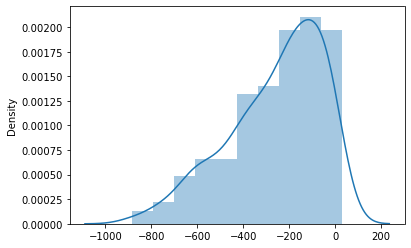

In [101]:
sns.distplot(sample_assimetrica_negativa)

Verificando graficamente as distribuições dos atributos do Dataframe

C:\Users\marcf\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\marcf\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\marcf\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

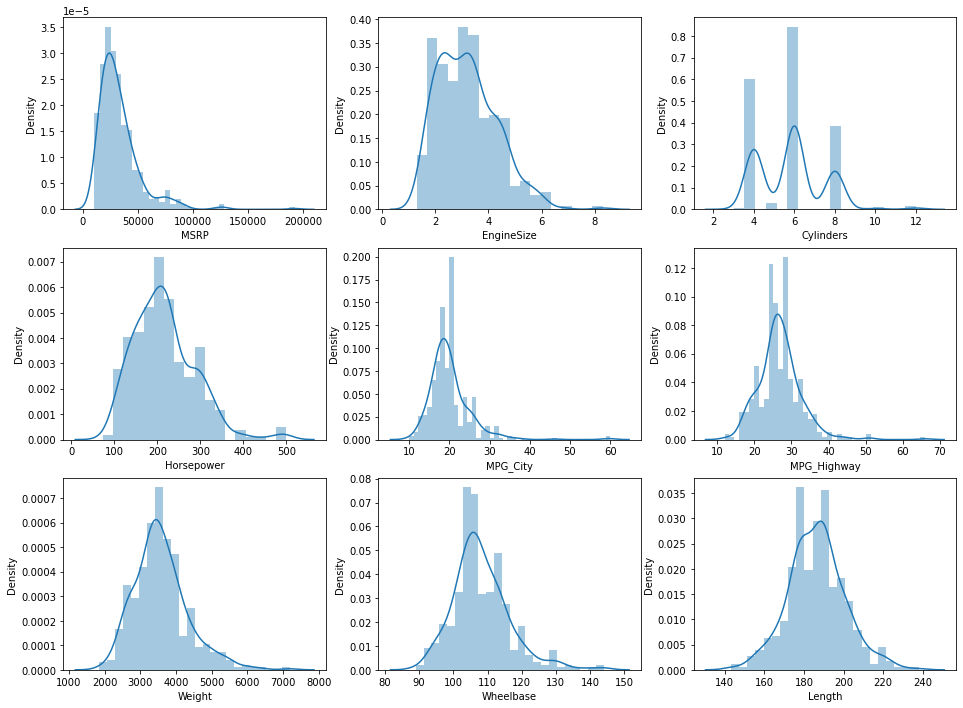

In [102]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(16,12))
for i, column in enumerate(df.select_dtypes(include=np.number).columns.tolist()):
    sns.distplot(df[column],ax=axes[i//3,i%3])

Verificando a distribuição de probabilidade e a diferença entre a média e a mediana

In [104]:
for i, column in enumerate(df.select_dtypes(include=np.number).columns.tolist()):
    media = round(df[column].mean(),2)
    std = df[column].std()
    cvar = round(std/media*100,2)
    median = df[column].median()
    print('Atributos: {}, Coeficiente de Variação: {} %, Média: {}, Mediana: {}'.format(column,cvar,media,median))

Atributos: MSRP, Coeficiente de Variação: 59.29 %, Média: 32774.86, Mediana: 27635.0
Atributos: EngineSize, Coeficiente de Variação: 34.64 %, Média: 3.2, Mediana: 3.0
Atributos: Cylinders, Coeficiente de Variação: 26.82 %, Média: 5.81, Mediana: 6.0
Atributos: Horsepower, Coeficiente de Variação: 33.27 %, Média: 215.89, Mediana: 210.0
Atributos: MPG_City, Coeficiente de Variação: 26.11 %, Média: 20.06, Mediana: 19.0
Atributos: MPG_Highway, Coeficiente de Variação: 21.39 %, Média: 26.84, Mediana: 26.0
Atributos: Weight, Coeficiente de Variação: 21.21 %, Média: 3577.95, Mediana: 3474.5
Atributos: Wheelbase, Coeficiente de Variação: 7.69 %, Média: 108.15, Mediana: 107.0
Atributos: Length, Coeficiente de Variação: 7.7 %, Média: 186.36, Mediana: 187.0
